In [3]:
import seaborn as sbn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline

# Framework of ML

**Supervised Machine Learning**

1. ML sysstems learn
2. how to combine input
3. to produce usefull predictions
4. on never before seen data
   
**Label** : is the varibale we re predicting 

**Features** : are the input varibales describing our data

**Example** :  
   1. Labeled example has feature and label.
   2. Unlabeled examples has only feature.
   3. Modesl maps examples to predicted labels.
      1. Defined by internal parameters which are learned.
      2. Training means creating or learning the model. That is, you show the model labeled examples and enable the model to gradually learn the relationships between features and label.
      3. Inference means applying the trained model to unlabeled examples. That is, you use the trained model to make useful predictions (y'). For example, during inference, you can predict medianHouseValue for new unlabeled examples.

|housingMedianAge(feature)|totalRooms(feature)|totalBedrooms(feature)|medianHouseValue(label)|
|---|---|----|---|
|15|5612|1283|66900|
|19|7650|1901|80100|
|17|720|174|85700|
|14|1501|337|73400|
|20|1454|326|65500|

## Regressiong vs Classification

1. A regression model predicts continuous values. like values or x,y things
2. A classification model predicts discrete values. yes or no 1 or 0 boolean values.

0.11520053859619095 0.4939461545211782


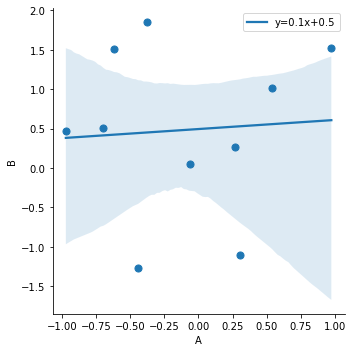

In [4]:
s=pd.DataFrame(np.random.randn(10,4),columns=list('ABCD'))
slope, intercept, r_value, p_value, std_err = stats.linregress(s['A'],s['B'])
print(slope,intercept)
ax=sbn.lmplot(x='A',y='B',data=s,x_estimator=np.mean,line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.legend()


## Regression Model

We define our model as $y^{'} = b + \sum_{w_{i},x_{i} =1}^{i=n} w_{i}.x_{i}$, where i to n define how many predictor we have and for each **predictor(x)** we have **w** which is the weight of that predictor on the **prediction(y)**. and the b is the bias or $w_{0}$ that is the y intercept.

## Loss function for Regression

$L_{2} = \sum_{x,y} (y-prediction(x)^2)$

since line is not fitted through every points there is loss of information of prediction, points above the line have negative loss as line is predicting info below it and for points which are below the lines loss is positive as predicition is above the actual point.

when training the model we want to minimise this $L_{2}$.

some time we divide our $L_{2}$ by $||D||=\text{length of dataset}$ that is our avergae our loss function that is mean square error.

## Training or loss minitation
1. In supervised learning, a machine learning algorithm builds a model by examining many examples and attempting to find a model that minimizes loss; this process is called empirical risk minimization.
2. Loss is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater. The goal of training a model is to find a set of weights and biases that have low loss, on average, across all examples.

![FLowchart](./diagram/notes_1_flowchart.drawio.svg "FLowChart")




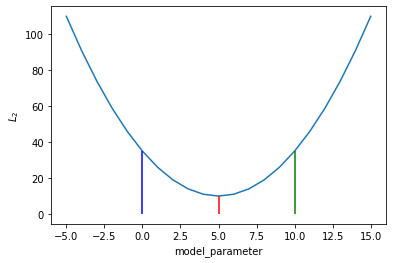

In [42]:
s={}
for i in range(-10,11,1):
    s[i]={'model_parameter':i+5,r'$L_{2}$':i**2+10}
s=pd.DataFrame.from_dict(s,orient='index')
sbn.lineplot(data=s,x='model_parameter',y=r'$L_{2}$')
plt.vlines(x=5.0,ymin=0,ymax=10,color='red')
plt.vlines(x=0.0,ymin=0,ymax=35,color='blue')
plt.vlines(x=10.0,ymin=0,ymax=35,color='green')

we can inscrease the learning rate or decrease it via choosing our model paramter and thier weight blue line reperesent our data hase more of gradient is lowering or our loss are not decreasing  and green line repersent reverse. red line reperesnet the model parameter at which our loss is minimum but is not zero we slowly reach a minimum part from a gradient this is gradient desence algorithm.

how many steps are needed to check for l2 values and reach minima is depeneded on model learning rate

this is great for convex problems where weights an start from any value hence we are able to get proper gradient and one minima is there. but for non convex problems like neural nets we can have different shapes or multiple minimas intermediated by local maximas.

> As noted, the gradient vector has both a direction and a magnitude. Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

> There's a Goldilocks learning rate for every regression problem. The Goldilocks value is related to how flat the loss function is. If you know the gradient of the loss function is small then you can safely try a larger learning rate, which compensates for the small gradient and results in a larger step size.